# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [22]:
medical.shape

(1338, 8)

In [23]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Figure below shows that the data is not a normal distribution and most of charges are below 15000. The mean seems overestimated because of extrememy high charges on the right end of the histogram. The standard deviation can't reflect the variation of the data properly.

In [24]:
charge_mean = np.mean(medical.charges)
charge_std = np.std(medical.charges)

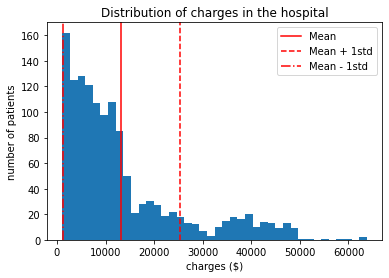

In [25]:
plt.hist(medical.charges, bins=40)
plt.xlabel('charges ($)')
plt.ylabel('number of patients')
plt.title('Distribution of charges in the hospital')
plt.axvline(charge_mean, color='r')
plt.axvline(charge_mean+charge_std, color='r', linestyle='--')
plt.axvline(charge_mean-charge_std, color='r', linestyle='-.')
plt.legend(['Mean','Mean + 1std','Mean - 1std'])
plt.show();

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given the assumption, the actual charge average (the average charge in the whole population, i.e., hosiptal) can be estimated from the sample by using the Central Limit Theorem (CLT).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 
- Given the data size, 95% confidence interval is appropriate.
- As the administrator is concerned that the actual average charge has fallen below 12,000, **one-sided** interval works here.
- The critical value is calculated to be 1.64.
- THe one-side 95% confidence interval is shown in the figure below. It can be seen that 12,000 is within the 95% confidence interval. Therefore, we may suggest the administrator may not be concerned.

In [27]:
# Apply the CLT. 
# Approximately 1/10th of the sample are collected 10000 times.
clt_sample = [np.mean(medical.charges.sample(130)) for i in range(10000)]
clt_sample_mean = np.mean(clt_sample)
clt_sample_std = np.std(clt_sample)

In [29]:
clt_sample_margin_of_error = stats.norm.ppf(0.95,clt_sample_mean,clt_sample_std)-clt_sample_mean
print('sample mean is ', clt_sample_mean)
print('sample std is ', clt_sample_std)
print('1 side 95% Confidence interval = ',clt_sample_mean - clt_sample_margin_of_error)

sample mean is  13271.588567235312
sample std is  1005.068080523449
1 side 95% Confidence interval = > 11618.398689653162


In [30]:
# critical value
clt_z = clt_sample_margin_of_error / clt_sample_std
clt_z

1.6448536269514729

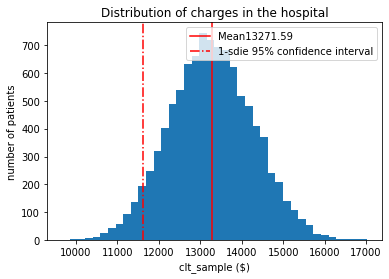

In [33]:
plt.hist(clt_sample, bins=40)
plt.xlabel('clt_sample ($)')
plt.ylabel('number of patients')
plt.title('Distribution of charges in the hospital')
plt.axvline(clt_sample_mean, color='r')
#plt.axvline(clt_sample_mean + clt_sample_margin_of_error, color='r', linestyle='--')
plt.axvline(clt_sample_mean - clt_sample_margin_of_error, color='r', linestyle='-.')
plt.legend(['Mean'+str("{0:.2f}".format(clt_sample_mean)),'1-sdie 95% confidence interval'])
plt.show();

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  
- H0: The difference in changes between insured and uninsured people is zero. 
- Ha: The difference in changes between insured and uninsured people is not zero. 
- Assumption: the variances of the two groups are identical.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [15]:
uninsured_charge = medical.charges[medical.insuranceclaim==0]
insured_charge = medical.charges[medical.insuranceclaim==1]

In [16]:
#sp calculation
sp = np.sqrt(((insured_charge.shape[0] - 1) * np.std(insured_charge) ** 2 + 
              (uninsured_charge.shape[0] - 1) * np.std(uninsured_charge) ** 2)/
             (insured_charge.shape[0] + uninsured_charge.shape[0] - 2))

t_statistic = (np.mean(insured_charge) - np.mean(uninsured_charge))/sp/np.sqrt(1/insured_charge.shape[0] + 1/uninsured_charge.shape[0])
print(t_statistic)

11.901306943555387


In [18]:
pvalue = stats.t.sf(np.abs(t_statistic), len(insured_charge)-1)*2
print(pvalue)

3.9031646358663275e-30


In [17]:
from scipy import stats
stats.ttest_ind(insured_charge,uninsured_charge,equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No.  Because Z-test needs to know the population standard deviation while t-test can use sample standard.deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test